# Safety Prediction

    Location: Workshop
    Duration: 2019 - 2024 
    Purpose: 
    
    This project is designed to alert the superior to monitor more closely the specific technician due to his/her risk peercentage and past incident.
    

## Data Analysis
---


In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# set the default Seaborn style for graphics
sb.set() 

### Import CSV file

Simple data information


In [2]:
wsdp = pd.read_csv('workshop_incident_cleaned.csv')
wsdp.head()


,Unit,Date,Member,Age,Year of Tech,Experience,Reliability,Difficulty Level,Sleep,Temperature,Humidity,Time of Day,Hour
0,3,2019-01-02,Koh,41,2,5,1,1,7,27,83.0,1900-01-01 15:00:00,15
1,1,2019-08-01,Lee,21,1,1,1,4,7,27,83.0,1900-01-01 09:30:00,9
2,1,2019-10-31,Yong,20,1,2,1,4,7,27,83.0,1900-01-01 16:55:00,16
3,1,2020-03-09,Victor,21,1,2,2,2,7,30,78.0,1900-01-01 11:00:00,11
4,1,2020-06-11,Loh,21,1,2,1,1,7,30,78.0,1900-01-01 11:40:00,11


In [3]:
wsdp.describe()

,Unit,Age,Year of Tech,Experience,Reliability,Difficulty Level,Sleep,Temperature,Humidity,Hour
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4.750000,21.950000,1.15000,1.840000,1.090000,2.490000,6.960000,29.340000,78.990000,12.900000
std,3.182576,4.063573,0.35887,0.837505,0.287623,1.123621,0.242878,2.094823,3.742993,2.354879
min,1.000000,19.000000,1.00000,1.000000,1.000000,1.000000,5.000000,26.000000,74.000000,9.000000
25%,1.000000,20.000000,1.00000,1.000000,1.000000,1.000000,7.000000,27.000000,76.000000,11.000000
50%,3.000000,21.000000,1.00000,2.000000,1.000000,3.000000,7.000000,30.000000,78.000000,13.000000
75%,9.000000,22.000000,1.00000,2.000000,1.000000,3.000000,7.000000,31.000000,83.000000,15.000000
max,9.000000,41.000000,2.00000,5.000000,2.000000,4.000000,7.000000,32.000000,85.000000,17.000000


In [4]:
wsdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unit              100 non-null    int64  
 1   Date              100 non-null    object 
 2   Member            100 non-null    object 
 3   Age               100 non-null    int64  
 4   Year of Tech      100 non-null    int64  
 5   Experience        100 non-null    int64  
 6   Reliability       100 non-null    int64  
 7   Difficulty Level  100 non-null    int64  
 8   Sleep             100 non-null    int64  
 9   Temperature       100 non-null    int64  
 10  Humidity          100 non-null    float64
 11  Time of Day       100 non-null    object 
 12  Hour              100 non-null    int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 10.3+ KB


## Data Loading and Processing

In [5]:
wsdp = pd.DataFrame(wsdp)
# Assuming df is your DataFrame
wsdp['Date'] = pd.to_datetime(wsdp['Date'])

# Select numerical features for scaling
#features = ['Age', 'Experience', 'Reliability', 'Sleep', 'Temperature','Humidity']
features = ['Age', 'Year of Tech', 'Experience', 'Reliability', 'Sleep', 'Temperature', 'Difficulty Level']
#features = ['Age', 'Year of Tech', 'Experience', 'Reliability', 'Sleep']

# Standardize the features
# To ensure they have a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
wsdp_scaled = scaler.fit_transform(wsdp[features])
print(wsdp_scaled[:5])

[[ 4.7116097   2.38047614  3.79212135 -0.31448545  0.16552118 -1.12266699
  -1.33274983]
 [-0.23496216 -0.42008403 -1.00803226 -0.31448545  0.16552118 -1.12266699
   1.35063909]
 [-0.48229076 -0.42008403  0.19200614 -0.31448545  0.16552118 -1.12266699
   1.35063909]
 [-0.23496216 -0.42008403  0.19200614  3.17979734  0.16552118  0.31664967
  -0.43828686]
 [-0.23496216 -0.42008403  0.19200614 -0.31448545  0.16552118  0.31664967
  -1.33274983]]


## Data Visualisation 

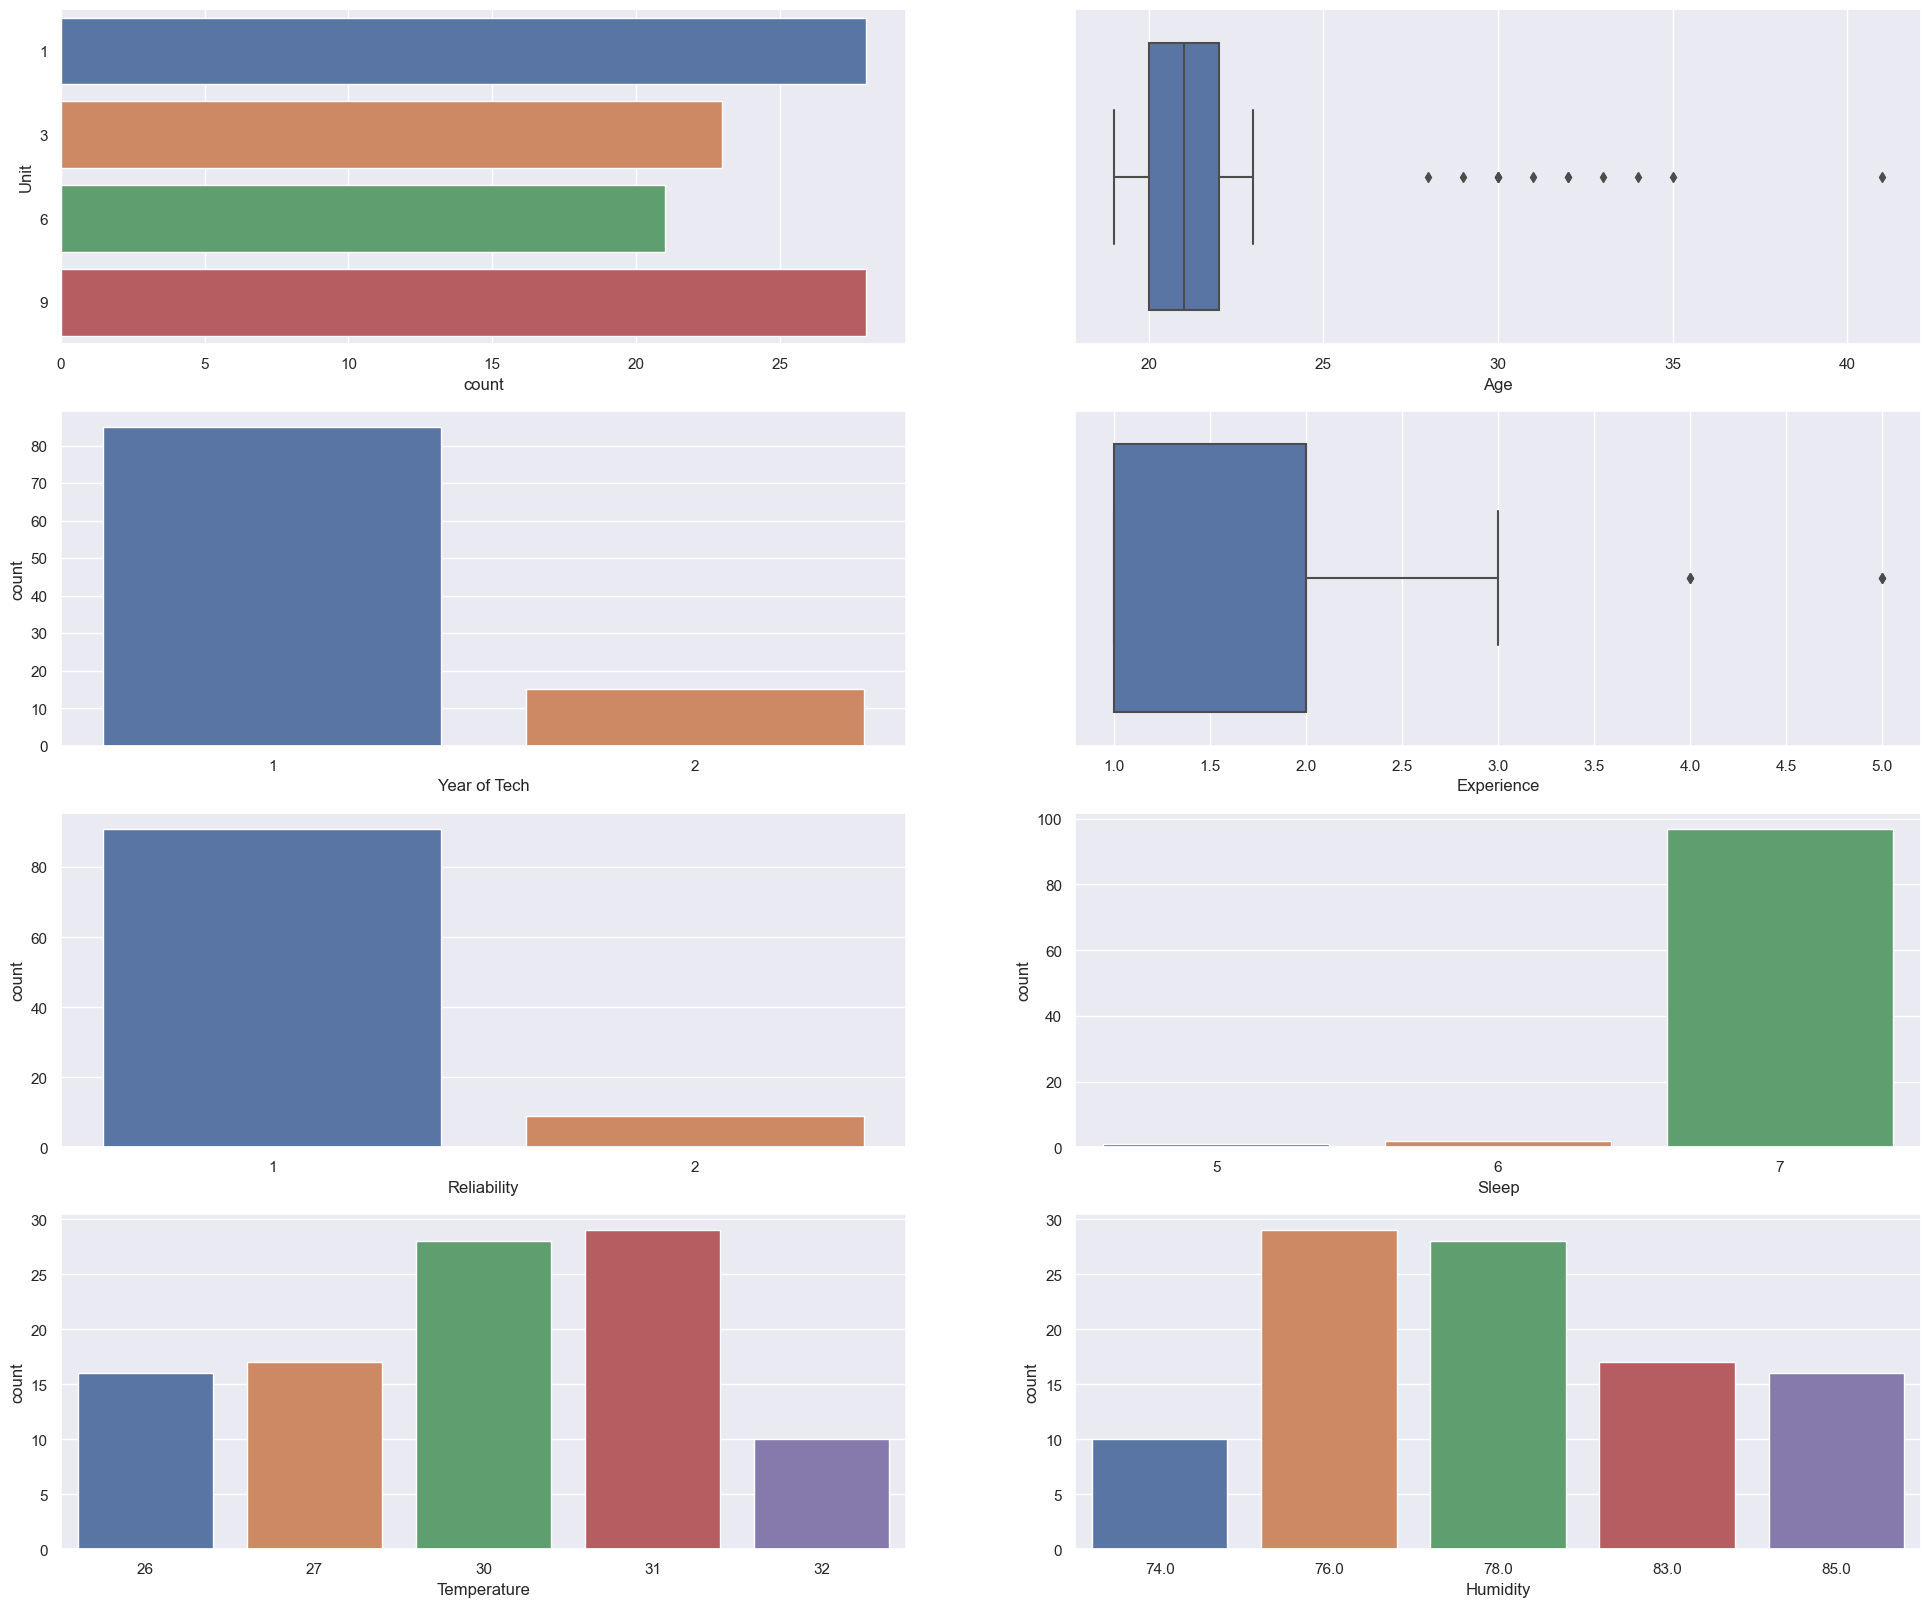

In [6]:
# Plot the distributions of Total Train
f, axes = plt.subplots(4, 2, figsize=(24, 20))

sb.countplot(y="Unit", data=wsdp, ax=axes[0, 0])
sb.boxplot(x="Age", data=wsdp, orient="h", ax=axes[0, 1])

sb.countplot(x="Year of Tech", data=wsdp, ax=axes[1, 0])
sb.boxplot(x="Experience", data=wsdp, ax=axes[1, 1])

sb.countplot(x="Reliability", data=wsdp, orient="h" ,ax=axes[2, 0])
sb.countplot(x="Sleep", data=wsdp, ax=axes[2, 1])

sb.countplot(x="Temperature", data=wsdp, orient="h" ,ax=axes[3, 0])
sb.countplot(x="Humidity", data=wsdp, orient="h" ,ax=axes[3, 1])

plt.show()


C:\Users\tan_g\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


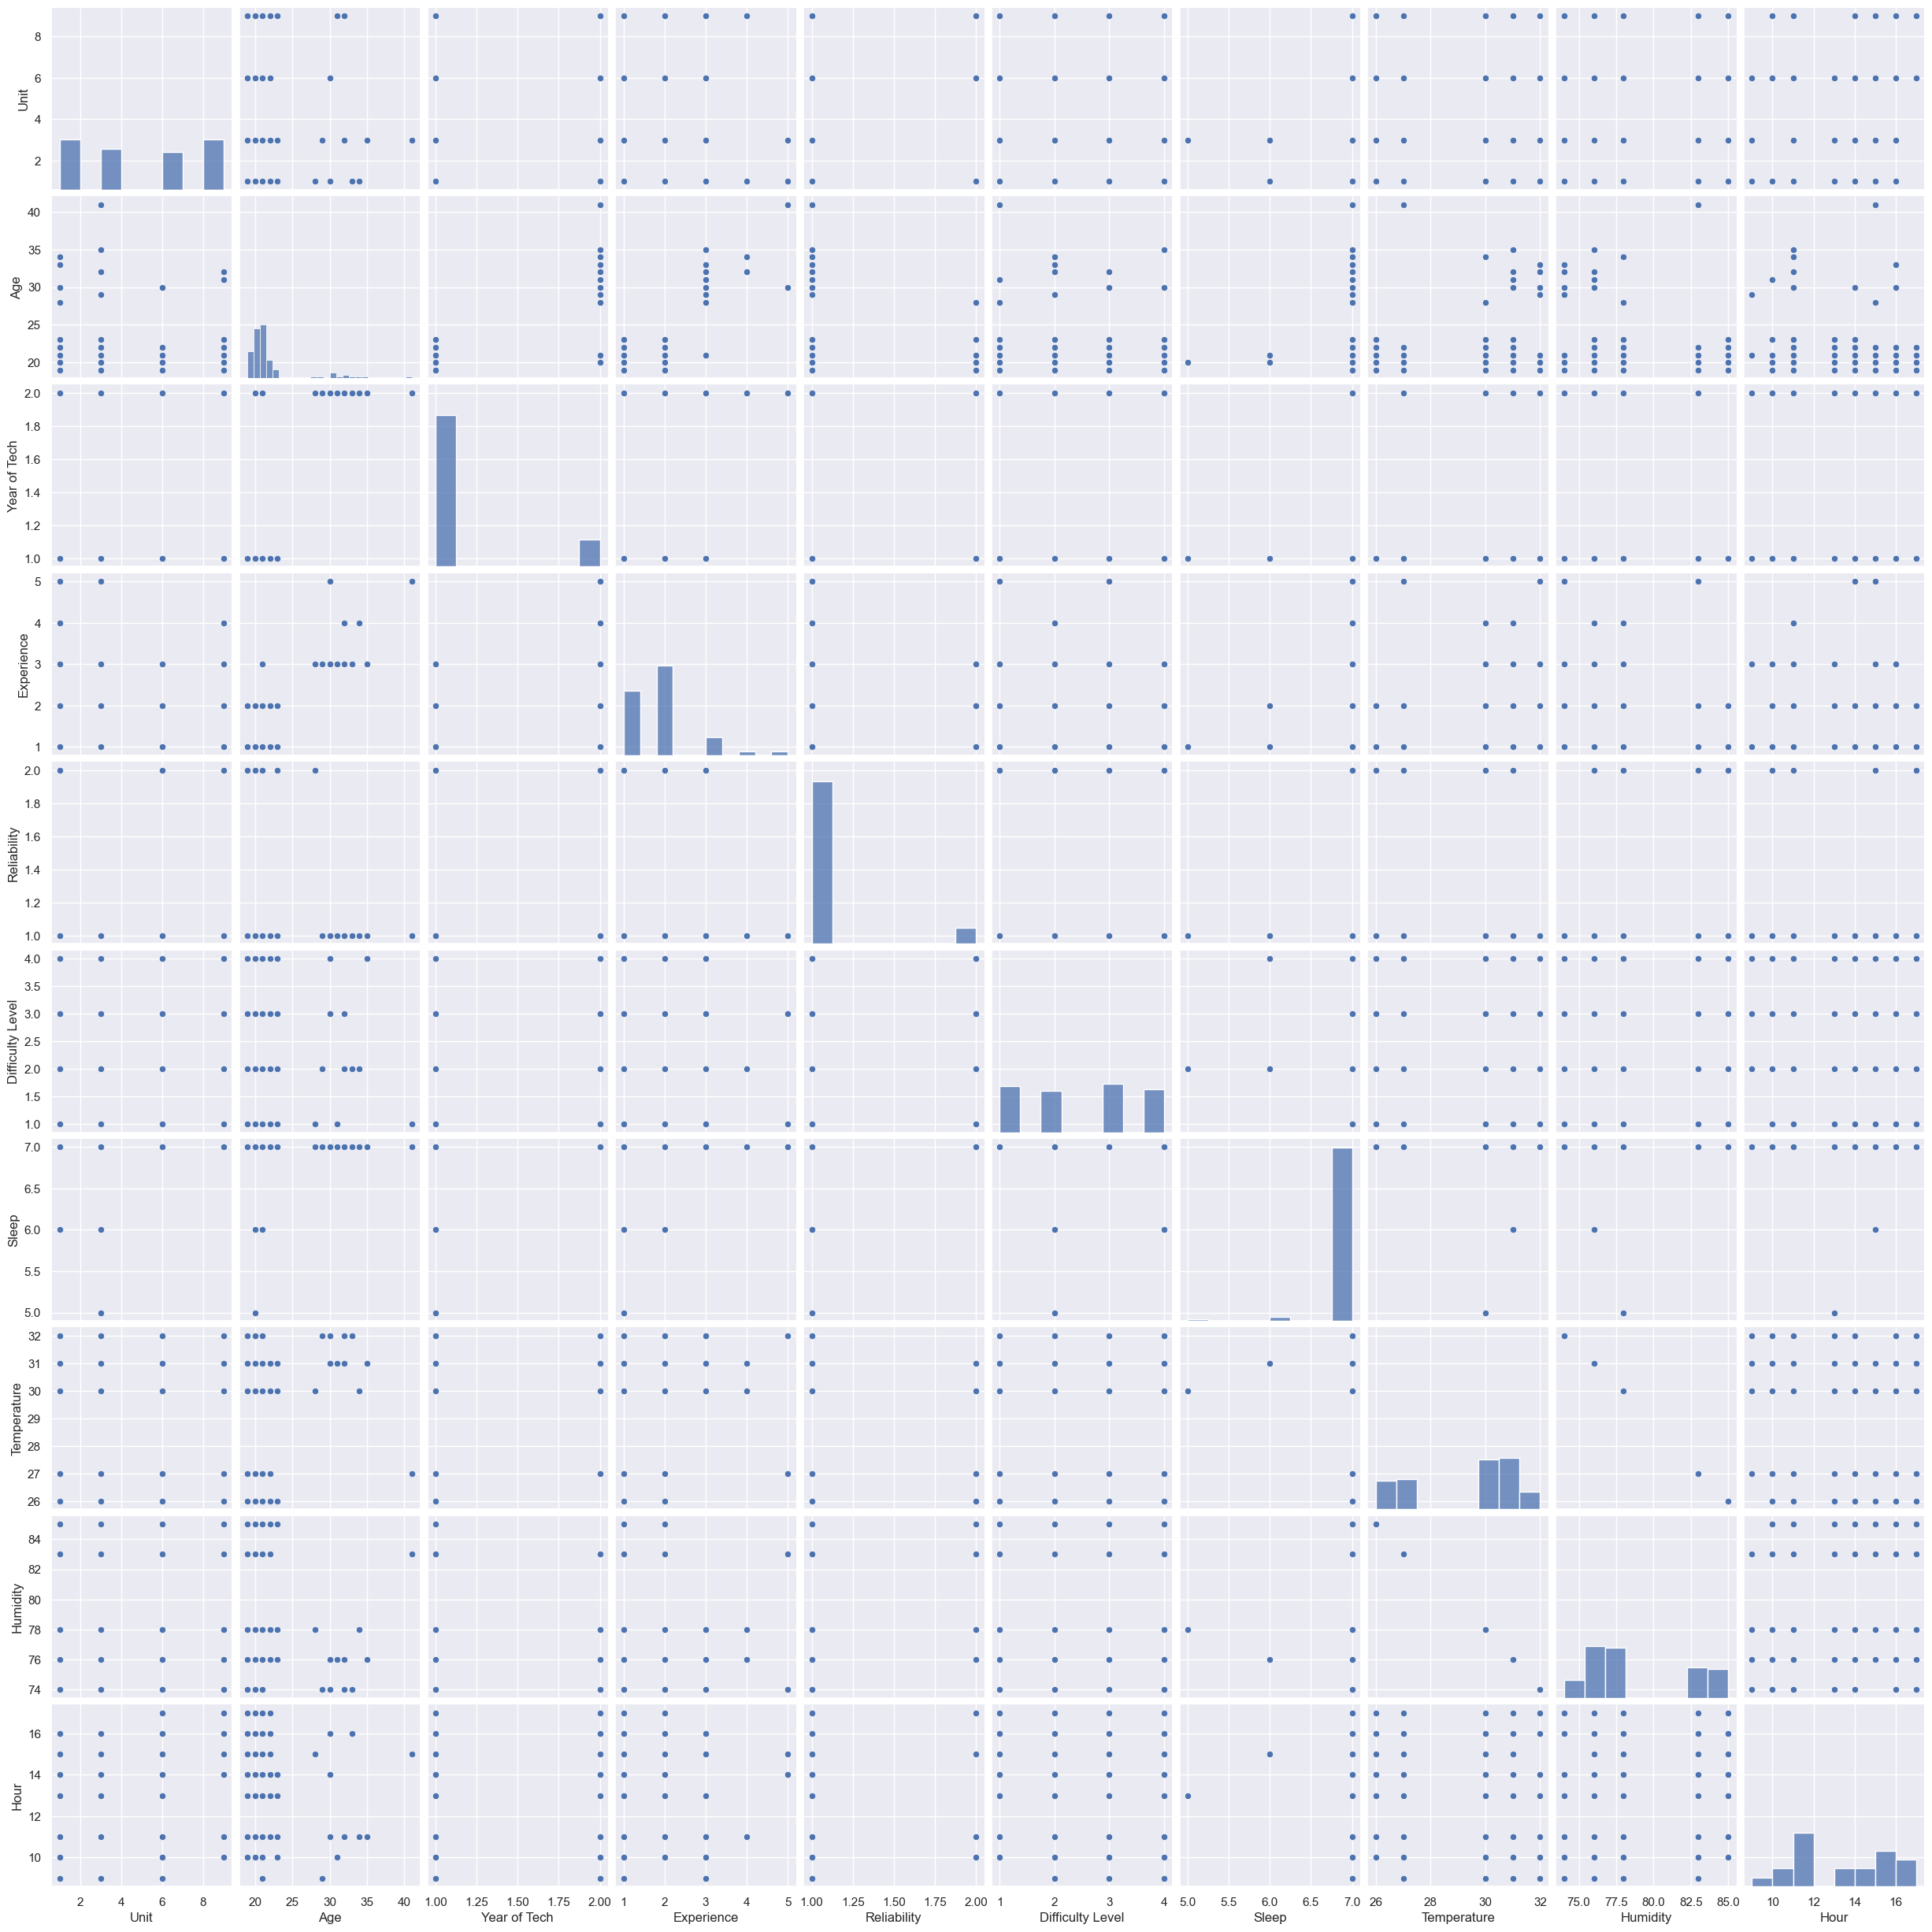

In [7]:
# Pairplot
sb.pairplot(wsdp)
plt.show()

## Machine Learning - Clustering
---

## K-Mean Algorithm

C:\Users\tan_g\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


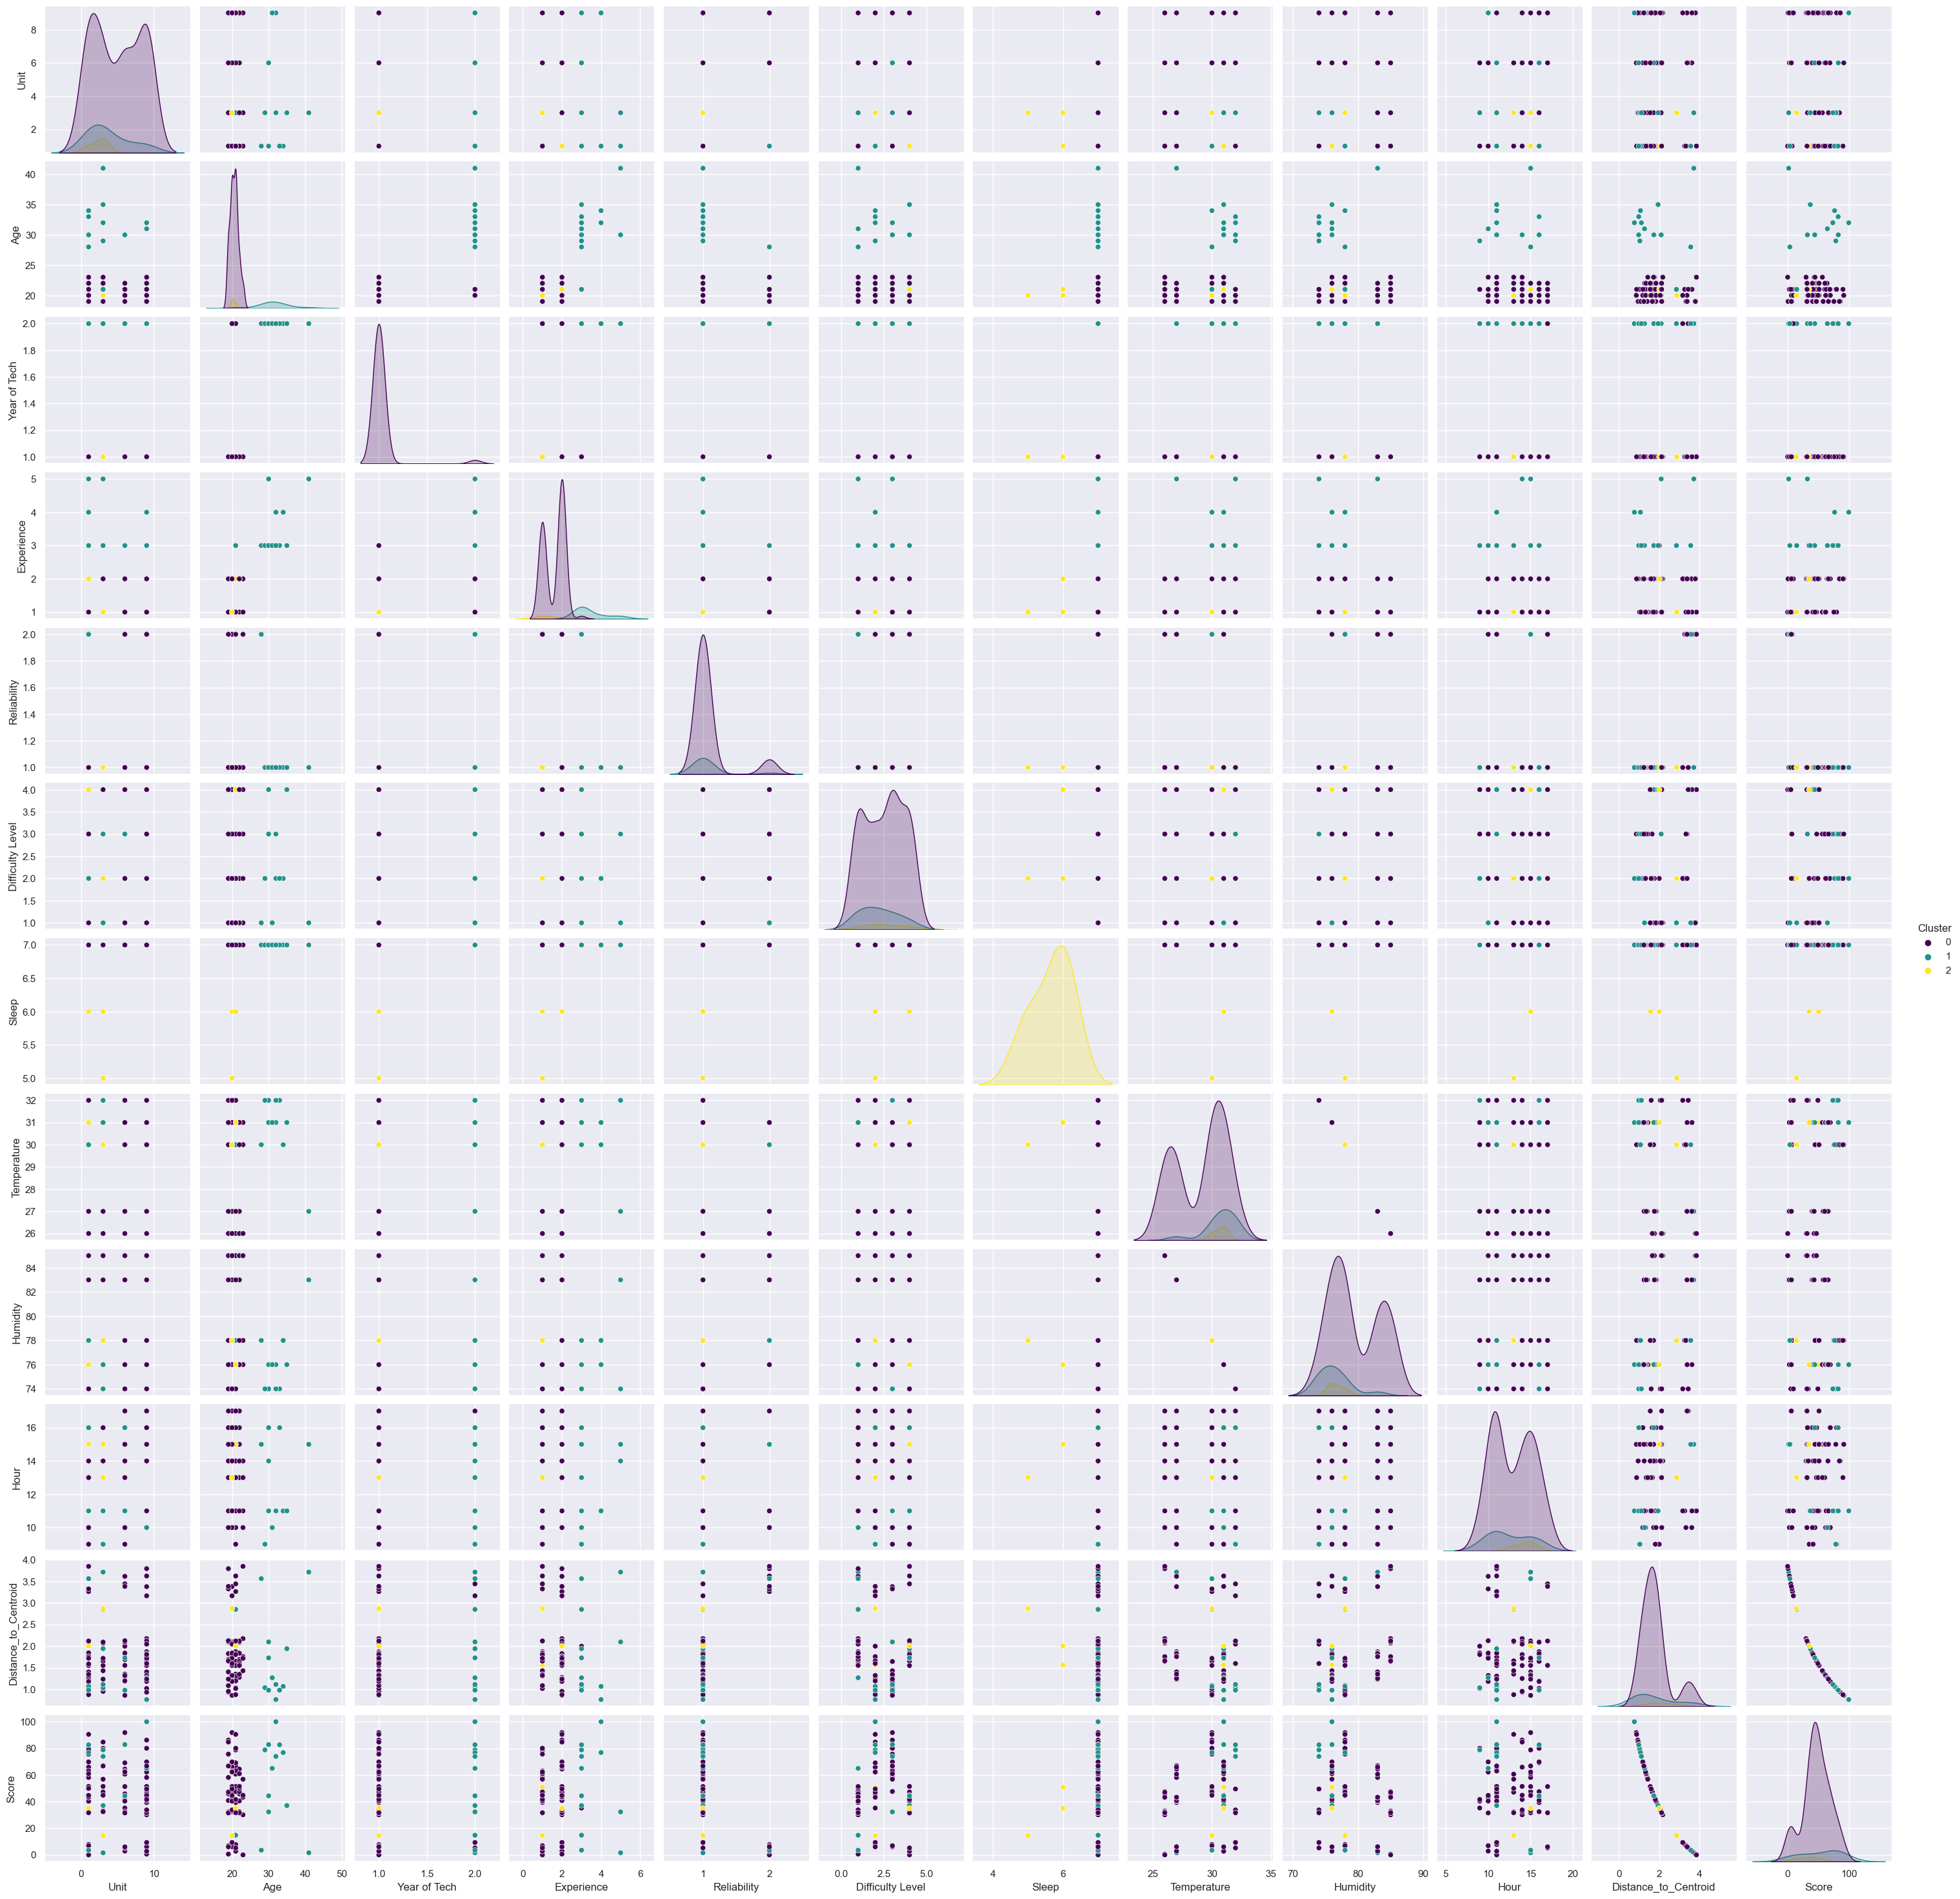

In [8]:
from sklearn.cluster import KMeans

# K-means Clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0) # Set the number of clusters
kmeans.fit(wsdp_scaled) # Fit the model
clusters = kmeans.predict(wsdp_scaled) # Predict the clusters

# Add the cluster labels to the original DataFrame
wsdp['Cluster'] = clusters

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Calculate distances 
distances = np.sqrt(((wsdp_scaled - centroids[clusters]) ** 2).sum(axis=1))
wsdp['Distance_to_Centroid'] = distances

# Calculate scores 
raw_scores = 1 / (1 + distances)

# Normalize the scores to the range 0-100%
min_score = raw_scores.min()
max_score = raw_scores.max()
normalized_scores = 100 * (raw_scores - min_score) / (max_score - min_score)
# Add the scores to the original DataFrame
wsdp['Score'] = normalized_scores

# Define the features to be used
likelihood_features = ['Age', 'Experience', 'Reliability', 'Sleep','Temperature', 'Year of Tech']
severity_features = [ 'Distance_to_Centroid', 'Difficulty Level']

# Standardize the features
scaler = StandardScaler()
wsdp_scaled_likelihood = scaler.fit_transform(wsdp[likelihood_features])
wsdp_scaled_severity = scaler.fit_transform(wsdp[severity_features])

# Combine the scaled dataframes for full PCA
wsdp_scaled_combined = np.hstack((wsdp_scaled_likelihood, wsdp_scaled_severity))

# Convert the scaled array back to DataFrames for readability
wsdp_scaled_likelihood_df = pd.DataFrame(wsdp_scaled_likelihood, columns=likelihood_features)
wsdp_scaled_severity_df = pd.DataFrame(wsdp_scaled_severity, columns=severity_features)
wsdp_scaled_combined_df = pd.DataFrame(wsdp_scaled_combined, columns=likelihood_features + severity_features)

# Create a pairplot of the clusters
sb.pairplot(wsdp, hue='Cluster', palette='viridis', diag_kind='kde')
plt.show()

### Finding from above pairplot

We can see that the in some feature combinations, the clusters are not well separated. From the pariplot above, we can understand which features has less effective at differentiating the clusters. 

## Evaluation 

1. **Silhouette Score**
>The silhouette score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1, with a higher score indicating better-defined clusters.
2. **Davis-Bouldin Index**
>The Davies-Bouldin Index evaluates the average similarity ratio of each cluster with its most similar cluster. Lower values indicate better clustering.
3. **Mean Squared Error**
>Measures the average of the squares of the errors, which is the difference between the original and reconstructed data.
4. **Visual Inspection**
>Visualizing the clusters can provide insights into how well the model has grouped the data.

In [9]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, mean_squared_error

# Calculate silhouette score
sil_score = silhouette_score(wsdp_scaled, clusters)
print(f'Silhouette Score: {sil_score:.3f}')

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(wsdp_scaled, clusters)
print(f'Davies-Bouldin Index: {db_index:.3f}')

# Calculate MSE
mse = mean_squared_error(wsdp_scaled, centroids[clusters])
print(f'Mean Squared Error: {mse:.3f}')


Silhouette Score: 0.506
Davies-Bouldin Index: 0.766
Mean Squared Error: 0.545


## Stability and Robustness Testing

Perform the following techniques:
1. **Multiple runs with different random seeds:**
> Run the clustering algorithm multiple times with different random seeds and compare the results.
2. **Subsampling:**
> Run the algorithm on different random subsets of the data and compare the clustering results.

In [10]:
from sklearn.model_selection import train_test_split

# Number of runs for robustness testing
n_runs = 100

# Lists to store metric values
silhouette_scores = []
davies_bouldin_indices = []
mse_scores = []

# Fit KMeans clustering multiple times with different random states and subsampling
for run in range(n_runs):
    # Subsample the data
    X_train, _, y_train, _ = train_test_split(wsdp_scaled, clusters, test_size=0.5, random_state=run)
    
    # Fit KMeans on the subsampled data
    kmeans = KMeans(n_clusters=3,  n_init=10, random_state=run)
    kmeans.fit(X_train)
    subsample_clusters = kmeans.predict(X_train)
    
    # Calculate centroids and MSE for the training set
    centroids = kmeans.cluster_centers_
    mse = mean_squared_error(X_train, centroids[subsample_clusters])
    mse_scores.append(mse)
    
    # Predict clusters on the original data
    labels = kmeans.predict(wsdp_scaled)
    
    # Calculate metrics
    sil_score = silhouette_score(wsdp_scaled, labels)
    db_index = davies_bouldin_score(wsdp_scaled, labels)
    silhouette_scores.append(sil_score)
    davies_bouldin_indices.append(db_index)

# Calculate mean and standard deviation for each metric
silhouette_mean = np.mean(silhouette_scores)
silhouette_std = np.std(silhouette_scores)
db_mean = np.mean(davies_bouldin_indices)
db_std = np.std(davies_bouldin_indices)
mse_mean = np.mean(mse_scores)
mse_std = np.std(mse_scores)

# Define acceptable ranges (mean ± std)
silhouette_range = (silhouette_mean - silhouette_std, silhouette_mean + silhouette_std)
db_range = (db_mean - db_std, db_mean + db_std)
mse_range = (mse_mean - mse_std, mse_mean + mse_std)

# Print results
# Create a DataFrame to display these ranges
ranges_df = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Davies-Bouldin Index', 'Mean Squared Error'],
    'Mean': [silhouette_mean, db_mean, mse_mean],
    'Standard Deviation': [silhouette_std, db_std, mse_std],
    'Range': [f'{silhouette_range[0]:.3f} - {silhouette_range[1]:.3f}', 
              f'{db_range[0]:.3f} - {db_range[1]:.3f}', 
              f'{mse_range[0]:.3f} - {mse_range[1]:.3f}']
})

# Display the DataFrame
from IPython.display import display
display(ranges_df)

# Add the final cluster labels to the original DataFrame
wsdp['Cluster'] = labels


,Metric,Mean,Standard Deviation,Range
0,Silhouette Score,0.427171,0.087785,0.339 - 0.515
1,Davies-Bouldin Index,0.950722,0.243299,0.707 - 1.194
2,Mean Squared Error,0.476165,0.066424,0.410 - 0.543


### Finding from above table

Base on the individual value, we can conclude that the model is consistent because all three metrics have ralatively low standard deviation. Also, the model quality are not perfect but they are reasonable well formed. Lastly, the model is generally robust and performs within a predictable range of values.

--- 
### Suggestion

1. Parameter tuning: change or reduce the features
2. Considering other clustering algorithm

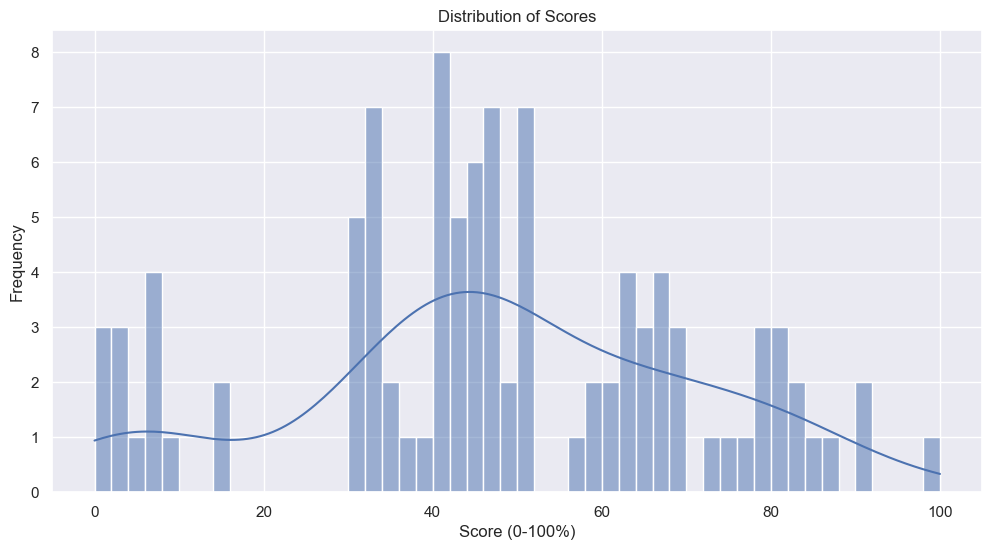

In [11]:
# Visualize the scores
plt.figure(figsize=(12, 6))
sb.histplot(wsdp['Score'], bins=50, kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Score (0-100%)')
plt.ylabel('Frequency')
plt.show()

### Finding from above graph

We can see there is a spike in range 60-70% range and there is some data points are very close or very far from their cluster centroids.

Base on the graph we can say the distribution is somewhat skewed, with a high concentration in the middle range. This tell us that most data points are neither too close nor too far from the centroids but moderately close.

Furthermore, the KDE line provide a smoothed estimate of the distribution, highlighting the central tendency and spread of the scores more clearly than the histogram.

---
### Potential action needed
1. Investigate the anomalies: why they are outlier or close to the centroids.
2. Cluster performance: How well the clusters represent the data points.
3. Visual analysis: To get a more comprehensive understanding of the clustering performance.
4. Adjustment: If score too low then need do adjustment to get better cluster quality.

## K-mean Visualisation (Principal Component Analysis)

C:\Users\tan_g\AppData\Local\Temp\ipykernel_32452\3888015037.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Score')


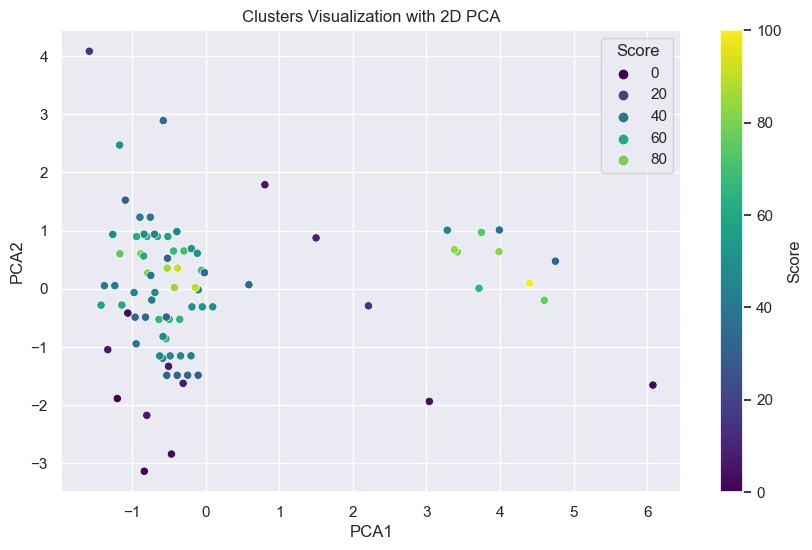

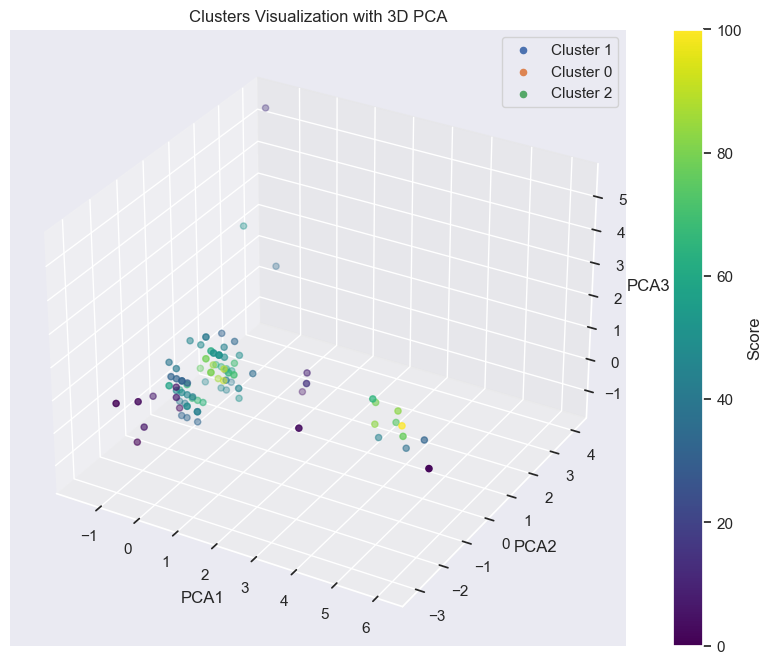

In [12]:
from sklearn.decomposition import PCA

# PCA Visualisation
pca = PCA(n_components=3)
wsdp_pca = pca.fit_transform(wsdp_scaled)

# Create a DataFrame with the PCA results and cluster labels
wsdp_viz = pd.DataFrame(data=wsdp_pca, columns=['PCA1', 'PCA2', 'PCA3'])
wsdp_viz['Cluster'] = clusters
wsdp_viz['Score'] = normalized_scores

# 2D PCA Plot 
plt.figure(figsize=(10, 6))
sb.scatterplot(x='PCA1', y='PCA2', hue='Score', palette='viridis', data=wsdp_viz)
plt.title('Clusters Visualization with 2D PCA')
norm = plt.Normalize(wsdp_viz['Score'].min(), wsdp_viz['Score'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Score')
plt.show()

# 3D PCA Plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')    
sc = ax.scatter(wsdp_viz['PCA1'], wsdp_viz['PCA2'], wsdp_viz['PCA3'], c=wsdp_viz['Score'], cmap='viridis')
plt.colorbar(sc, label='Score')

# Set plot title and labels
ax.set_title('Clusters Visualization with 3D PCA')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

# Add legend for clusters
for cluster in wsdp_viz['Cluster'].unique():
    ax.scatter([], [], [], label=f'Cluster {cluster}')
    
# Add legend
ax.legend()
plt.show()


### Finding from above 2D plot

Above 2D plot show us how the clusters are distributed in the reduce dimensinal space.The clusters are reasonabluy well separated with some overlap.

The higher score (closer to 100%) are closer to the centroids while the lower score (closer to 0%) are more dispersed.

### Finding from above 3D plot

Above 3D plot provide us more information about the cluster separation. The plot show us better separation compare to 2D plot.

Similar to 2D plot, but 3D help identify the cluster that not obvious in 2D.

---
### Suggestion
1. Investigate outlier
2. Refine parameters
3. Feature Engineering (need to think how) 

In [13]:
# PCA Loading
pca = PCA(n_components=len(features))  # Number of components is equal to the number of features
pca.fit(wsdp_scaled)
loadings = pca.components_.T # Get loadings
loading_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=features) # Display loadings
print(loading_df)

# TUunderstand how much of the total variance in the data is captured by each principal component.
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

                       PC1       PC2       PC3       PC4       PC5       PC6  \
Age               0.572967  0.002863 -0.062112  0.020520  0.178134 -0.429624   
Year of Tech      0.576206  0.094364 -0.054458  0.118637  0.010740 -0.344086   
Experience        0.536710 -0.205720  0.053260 -0.098176  0.182774  0.789735   
Reliability      -0.047041 -0.471477  0.040600  0.878800 -0.011027  0.017893   
Sleep             0.079005 -0.460651 -0.634825 -0.220941 -0.573362 -0.025820   
Temperature       0.177585  0.612767  0.045044  0.317666 -0.645289  0.223238   
Difficulty Level -0.107918  0.372550 -0.763976  0.232054  0.435296  0.150080   

                       PC7  
Age              -0.671650  
Year of Tech      0.723554  
Experience       -0.007632  
Reliability      -0.033414  
Sleep            -0.018160  
Temperature      -0.154293  
Difficulty Level  0.006715  
[0.36742149 0.17352467 0.14348107 0.13360429 0.11973829 0.0384469
 0.02378329]


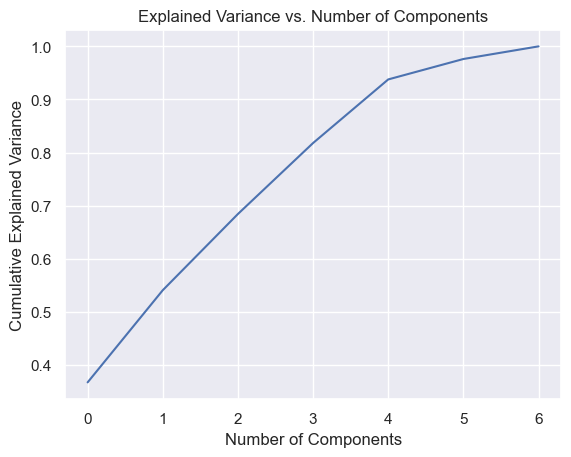

In [14]:
# Plot explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

In [39]:
# Calculate risk weights
# num_components = 3  # Number of principal components to consider
num_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
# Sum the absolute values of the loadings for the first few principal components
weights = np.sum(np.abs(loadings[:, :num_components]), axis=1)

# Normalize the weights to sum to 1
weights /= np.sum(weights)

# Create a dictionary of weights
risk_weights =  dict(zip(features, weights))
#print(wsdp_scaled)

# Add a weight for the distance to the centroid
risk_weights['Distance_to_Centroid'] = 0.3  # Example weight, adjust based on context

# Normalize the weights again to sum to 1
total_weight = sum(risk_weights.values())
risk_weights = {k: v / total_weight for k, v in risk_weights.items()}

# Calculate individual feature scores using the original values and the PCA weights
for feature in likelihood_features + severity_features:
    wsdp[f'{feature}_Score'] = wsdp[feature] * risk_weights[feature]
    
# Display
risk_weights

    

{'Age': 0.082015518585827,
 'Year of Tech': 0.0776285337011864,
 'Experience': 0.12088868676565415,
 'Reliability': 0.09500988900208976,
 'Sleep': 0.12919436442740984,
 'Temperature': 0.13094226172177315,
 'Difficulty Level': 0.13355151502682902,
 'Distance_to_Centroid': 0.23076923076923078}

In [40]:
# Aggregate the likelihood and severity scores
wsdp['Likelihood_Score'] = wsdp[[f'{feature}_Score' for feature in likelihood_features]].sum(axis=1)
wsdp['Severity_Score'] = wsdp[[f'{feature}_Score' for feature in severity_features]].sum(axis=1)

# Combine the likelihood and severity scores to calculate the total risk score
wsdp['Total_Risk_Score'] = wsdp['Likelihood_Score'] * wsdp['Severity_Score']
wsdp['Normalized_Risk_Score'] = (wsdp['Total_Risk_Score'] - wsdp['Total_Risk_Score'].min()) / (wsdp['Total_Risk_Score'].max() - wsdp['Total_Risk_Score'].min()) * 100

# Set options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the entire DataFrame
#wsdp



In [41]:
# Calculate individual feature scores
#wsdp['Age_Score'] = wsdp_scaled['Age'] * risk_weights['Age']
#wsdp['Year_of_Tech_Score'] = wsdp_scaled['Year of Tech'] * risk_weights['Year of Tech']
#wsdp['Experience_Score'] = wsdp_scaled['Experience'] * risk_weights['Experience']
#wsdp['Reliability_Score'] = wsdp_scaled['Reliability'] * risk_weights['Reliability']
#wsdp['Sleep_Score'] = wsdp_scaled['Sleep'] * risk_weights['Sleep']
#wsdp['Temperature_Score'] = wsdp_scaled['Temperature'] * risk_weights['Temperature']
#wsdp['Distance_Score'] = (wsdp_scaled['Distance_to_Centroid'] - wsdp_scaled['Distance_to_Centroid'].min()) / (wsdp_scaled['Distance_to_Centroid'].max() - wsdp_scaled['Distance_to_Centroid'].min()) * risk_weights['Distance_to_Centroid']

# Sort the DataFrame by Normalized_Risk_Score in descending order
sorted_wsdp = wsdp.sort_values(by='Normalized_Risk_Score', ascending=False)

# Display the DataFrame with the calculated risk scores in descending order of Normalized_Risk_Score
sorted_wsdp[['Age', 'Year of Tech', 'Experience', 'Reliability', 'Sleep','Difficulty Level', 'Temperature', 'Distance_to_Centroid', 'Likelihood_Score', 'Severity_Score', 'Total_Risk_Score', 'Normalized_Risk_Score']]


,Age,Year of Tech,Experience,Reliability,Sleep,Difficulty Level,Temperature,Distance_to_Centroid,Likelihood_Score,Severity_Score,Total_Risk_Score,Normalized_Risk_Score
59,21,1,1,2,7,4,31,3.625074,7.074434,1.370762,9.697362,100.000000
78,21,2,1,1,7,4,32,3.441590,7.187994,1.328419,9.548670,97.686657
39,23,1,1,2,7,4,26,3.847861,6.583753,1.422174,9.363242,94.801786
0,41,2,5,1,7,1,27,3.714965,8.657148,0.990851,8.577945,82.584150
85,35,2,3,1,7,4,31,1.940279,8.447047,0.981963,8.294686,78.177214
47,19,1,1,2,7,3,30,3.325852,6.779460,1.168159,7.919486,72.339873
18,20,1,2,2,7,3,27,3.377989,6.589538,1.180190,7.776910,70.121674
82,30,2,3,1,7,4,31,1.728663,8.036969,0.933128,7.499524,65.806112
80,28,2,3,2,7,1,30,3.563312,7.837006,0.955854,7.491036,65.674066
11,30,2,5,1,7,3,32,2.096545,8.409689,0.884473,7.438139,64.851097


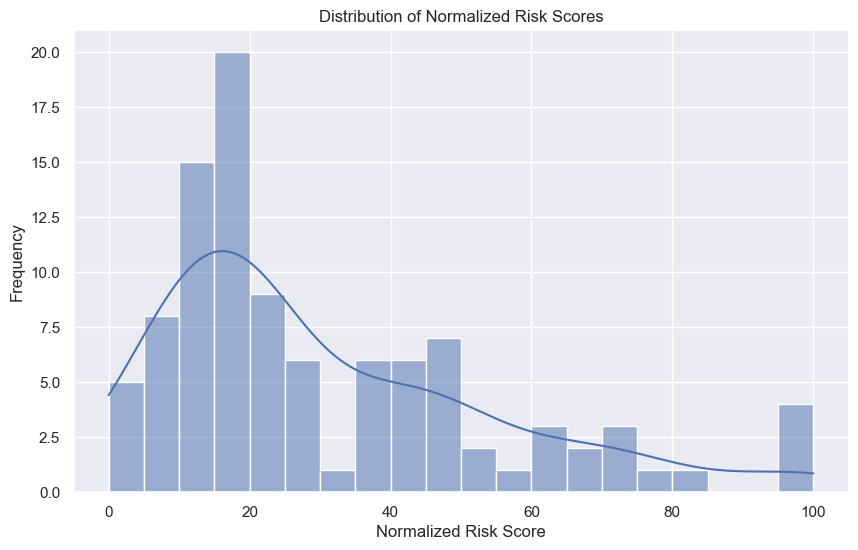

In [36]:
plt.figure(figsize=(10, 6))
sb.histplot(wsdp['Normalized_Risk_Score'], bins=20, kde=True)
plt.title('Distribution of Normalized Risk Scores')
plt.xlabel('Normalized Risk Score')
plt.ylabel('Frequency')
plt.show()

## Anomaly Detection 

In [37]:
# Set anomaly threshold (e.g., 2 standard deviations from mean distance)
threshold = np.mean(distances) + 2 * np.std(distances)

# Flag members as anomalies if their distance to centroid exceeds the threshold
anomalies = distances > threshold

# Display anomalies
anomalous_members = wsdp[anomalies]
print("Anomalous Members:", anomalous_members['Member'].tolist())

# Determine which features contribute the most to the anomaly detection
feature_importance = np.abs(kmeans.cluster_centers_[clusters] - wsdp_scaled)
max_feature_importance = np.max(feature_importance, axis=1)

# Create explanatory messages
explanations = []
for idx, anomaly in enumerate(anomalies):
    if anomaly:
        # Get the index of the most important feature for this anomaly
        most_important_feature_idx = np.argmax(feature_importance[idx])
        # Get the name and value of the most important feature
        most_important_feature_name = features[most_important_feature_idx]
        most_important_feature_value = wsdp.iloc[idx][most_important_feature_name]
        # Create an explanatory message
        explanation = f"Anomaly detected due to {most_important_feature_name} with value {most_important_feature_value}"
        explanations.append(explanation)

# Output anomalous member names with explanations
for anomalous_member, explanation in zip(anomalous_members["Member"], explanations):
    print(f"{anomalous_member} - {explanation}")


Anomalous Members: ['Koh', 'Lim', 'Naresh', 'Frank Garcia', 'Sara Garcia', 'Alan Wright', 'Matt Roberts', 'Frank Richardson', 'Henry Howard', 'Zane Bryant']
Koh - Anomaly detected due to Age with value 41
Lim - Anomaly detected due to Reliability with value 2
Naresh - Anomaly detected due to Reliability with value 2
Frank Garcia - Anomaly detected due to Reliability with value 2
Sara Garcia - Anomaly detected due to Reliability with value 2
Alan Wright - Anomaly detected due to Reliability with value 2
Matt Roberts - Anomaly detected due to Reliability with value 2
Frank Richardson - Anomaly detected due to Year of Tech with value 2
Henry Howard - Anomaly detected due to Reliability with value 2
Zane Bryant - Anomaly detected due to Reliability with value 2


## Scoring New Data Points

### Test the member's data (features)
---

This whole testing is for debugging and check accuracy purpose only. 

#### Finding:

Good example and still flag out:
- Too good (high value in "year of tech" and "experience")
- Too old 
- Sleep too much

Bad example and didnt flag out:
- New serviceman with Bad reliability
- serviceman with no experience 
- 

In [38]:
# Function to preprocess the new data point
def preprocess_data_point(new_data_point):
    new_data_point_array = np.array(new_data_point).reshape(1, -1)
    new_data_point_scaled = scaler.transform(new_data_point_array)
    return new_data_point_scaled

# Function to check if the new data point is an anomaly
def check_anomaly(new_data_point_scaled, kmeans, cluster_centers, threshold):
    # Predict the cluster label for the new data point
    new_data_point_cluster = kmeans.predict(new_data_point_scaled.reshape(1, -1))[0]
    # Calculate the distance to the cluster centroid
    centroid = cluster_centers[new_data_point_cluster]
    distance_to_centroid = np.sqrt(np.sum((new_data_point_scaled - centroid) ** 2))
    print(f"Distance to centroid: {distance_to_centroid}")
    print(f"Anomaly threshold: {threshold}")
    if distance_to_centroid > threshold:
        print("New data point is NOT flagged as an anomaly.")
    else:
        print("New data point is flagged as an anomaly.")

# Function to score the new data point
def score_data_point(new_data_point_scaled, kmeans, cluster_centers):
    new_data_point_cluster = kmeans.predict(new_data_point_scaled)[0]
    distance_to_centroid = np.sqrt(np.sum((new_data_point_scaled - cluster_centers[new_data_point_cluster]) ** 2))
    raw_score = 1 / (1 + distance_to_centroid)
    
    # Normalize the score relative to the training data distances
    min_distance = distances.min()
    max_distance = distances.max()
    normalized_score = 100 * (1- (raw_score - (1 / (1 + max_distance))) / ((1 / (1 + min_distance)) - (1 / (1 + max_distance))))
    return normalized_score

# Example usage
while True:
    new_data_point = [float(input(f"Enter value for {feature}: ")) for feature in features]
    new_data_point_scaled = preprocess_data_point(new_data_point)
    score = score_data_point(new_data_point_scaled, kmeans, centroids)
    print("Score for the new data point:", score)
    check_anomaly(new_data_point_scaled, kmeans, centroids, threshold)
    another_data_point = input("Do you want to input another data point? (yes/no): ")
    while another_data_point.lower() not in ['yes', 'no']:
        another_data_point = input("Please enter yes or no ONLY: ")
    if another_data_point == 'no':
        break


KeyboardInterrupt: Interrupted by user